## Table of Contents

1. [Data Loading and Profiling](##section1)<br>
    - 1.1 [Data Loading](#section101)<br/>
    - 1.2 [Validating the size of data by using tail function](#section102)<br/>
    - 1.3 [Using info function to analyze the data structure and memory](#section103)<br/>
    - 1.4 [Preplacing null value of city and winner with 0](#section104)<br/>
    - 1.5 [Replace multiple name with singular value](#section105)<br/>
    
    
2. [Data Manipulation](##section2)<br>
    - 2.1 [Adding field month in data](#section201)<br/>
    - 2.2 [Adding Win val field to calculate where toss winners have win the match](#section202)<br/>
    

3. [Data Analysis](##section3)<br>
    - 3.1 [Maximum win for the team using bar plot](#section301)<br/>
    - 3.2 [Percent win against toss_win using Pivot tables](#section302)<br/>
    - 3.3 [Maximum matches played in the city using bar plot](#section303)<br/>
    - 3.4 [Cross tab plot to map winner against Bat vs. Chase](#section304)<br/>
    - 3.5 [Cross tab to plot the win in the homeground](#section305)<br/>
    - 3.6 [Bat vs. Field performace across seasons using factor plot](#section306)<br/>
    - 3.7 [Maximum player of the match winnings using cross tab](#section307)<br/>

### 1. Data Loading and Profiling

#### 1.1 Data Loading

To gain insights from data we must look into each aspect of it very carefully. We will start with observing few rows and columns of data both from the starting and from the end

In [76]:
import pandas as pd
import seaborn as sns
import matplotlib as mat
match = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/matches.csv", index_col=0)
match.head()

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
id,,,,,,,,,,,,,,,,,
1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


#### 1.2 Validating the _size_ of data by using tail function

In [11]:
match.tail()

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
id,,,,,,,,,,,,,,,,,
7949,2018,Pune,20/05/18,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,5,L Ngidi,Maharashtra Cricket Association Stadium,Nitin Menon,Yeshwant Barde,Marais Erasmus
7950,2018,Mumbai,22/05/18,Sunrisers Hyderabad,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,2,F du Plessis,Wankhede Stadium,Marais Erasmus,C Shamshuddin,S Ravi
7951,2018,Kolkata,23/05/18,Kolkata Knight Riders,Rajasthan Royals,Rajasthan Royals,field,normal,0,Kolkata Knight Riders,25,0,AD Russell,Eden Gardens,Nitin Menon,Anil Chaudhary,Kumar Dharmasena
7952,2018,Kolkata,25/05/18,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,14,0,Rashid Khan,Eden Gardens,Nitin Menon,Kumar Dharmasena,Anil Chaudhary
7953,2018,Mumbai,27/05/18,Sunrisers Hyderabad,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,8,SR Watson,Wankhede Stadium,Marais Erasmus,S Ravi,Nitin Menon


#### 1.3 Using info function to analyze the data structure and memory

It has been identified that there are total _696 entries_ in the data. In addition, "city" field has 7 values missing, "winner" field has 3 values missing, "player of the match" has 3 values missing and "umpire 1" & "umpire 2" has 1 each missing value

In [26]:
match.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 696 entries, 1 to 7953
Data columns (total 17 columns):
season             696 non-null int64
city               689 non-null object
date               696 non-null object
team1              696 non-null object
team2              696 non-null object
toss_winner        696 non-null object
toss_decision      696 non-null object
result             696 non-null object
dl_applied         696 non-null int64
winner             693 non-null object
win_by_runs        696 non-null int64
win_by_wickets     696 non-null int64
player_of_match    693 non-null object
venue              696 non-null object
umpire1            695 non-null object
umpire2            695 non-null object
umpire3            60 non-null object
dtypes: int64(4), object(13)
memory usage: 117.9+ KB


#### 1.4 Replacing null value of city and winner with 0

In [139]:
match.city = match.city.fillna(match['city'].mode()[0])
match.winner = match.winner.fillna(match['city'].mode()[0])
match.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 696 entries, 1 to 7953
Data columns (total 18 columns):
season             696 non-null int64
city               696 non-null object
date               696 non-null object
team1              696 non-null object
team2              696 non-null object
toss_winner        696 non-null object
toss_decision      696 non-null object
result             696 non-null object
dl_applied         696 non-null int64
winner             696 non-null object
win_by_runs        696 non-null int64
win_by_wickets     696 non-null int64
player_of_match    693 non-null object
venue              696 non-null object
umpire1            695 non-null object
umpire2            695 non-null object
umpire3            60 non-null object
Month              696 non-null object
dtypes: int64(4), object(14)
memory usage: 123.3+ KB


In [36]:
match.to_excel("C:\\Users\\amarwah\\Desktop\\data.xlsx",sheet_name = 'Sheet1')


#### 1.5 Replace multiple name with singular value

"City" field has Bangalore and Bengaluru highlighted for a single value. Replacing Bangalore with Bengaluru
"Winner" field has "Mumbai Indians" and "Mumbai" value. Replacing Mumbai with Mumbai Indians

In [227]:
match['city'].replace("Bangalore","Bengaluru", inplace = True)
match['winner'].replace("Mumbai","Mumbai Indians", inplace = True)
match['winner'].replace("Rising Pune Supergiant","Rising Pune Supergiants", inplace = True)
match.city.unique()
match.winner.unique()

array(['Sunrisers Hyderabad', 'Rising Pune Supergiants',
       'Kolkata Knight Riders', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Mumbai Indians',
       'Delhi Daredevils', 'Gujarat Lions', 'Chennai Super Kings',
       'Rajasthan Royals', 'Deccan Chargers', 'Pune Warriors',
       'Kochi Tuskers Kerala'], dtype=object)

### 2. Data Manipulation 

#### 2.1 Adding month field in data

In [92]:
match['Month'] = pd.DatetimeIndex(match['date']).month
import calendar
match['Month'] = match['Month'].apply(lambda x: calendar.month_abbr[x])
match.head()

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,Month
id,,,,,,,,,,,,,,,,,,
1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,Apr
2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,Apr
3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,Apr
4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,Apr
5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,Apr


#### 2.2 Adding Win val field to calculate where toss winners have win the match

In [246]:
match['win val'] = match.winner == match.toss_winner
match['win val'].replace(True,1, inplace = True)
match['win val'].replace(False,0, inplace = True)
match.head()

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,Month,toss,win val
id,,,,,,,,,,,,,,,,,,,,
1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,Apr,NaN,0.0
2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiants,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,Apr,NaN,0.0
3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,Apr,NaN,1.0
4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,Apr,NaN,1.0
5,2017,Bengaluru,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,Apr,bat,1.0


### 3. Data Analysis

#### 3.1 Maximum win for the team using bar plot

Mumbai Indians has the maximum number of wins = 98 in the overall series across years

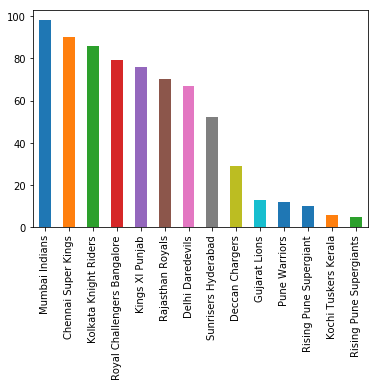

In [68]:
match['winner'].value_counts().plot.bar()

#### 3.2 Percent win against toss_win using Pivot tables

Rising Pune Supergiant have the maximum win i.e. 83% if they won the toss followed by Gujrat Lions with 67%
Only 15% wins against toss win is factored for Pune Warriors

In [251]:
table1 = pd.pivot_table(match, values=['winner'], index=['toss_winner'], aggfunc='count', fill_value=0)
table1

,winner
toss_winner,
Chennai Super Kings,77
Deccan Chargers,43
Delhi Daredevils,80
Gujarat Lions,15
Kings XI Punjab,75
Kochi Tuskers Kerala,8
Kolkata Knight Riders,87
Mumbai Indians,90
Pune Warriors,20


In [241]:
table2 = pd.pivot_table(match, values=['win val'], index=['toss_winner'], aggfunc='sum', fill_value=0)
table2

,win val
toss_winner,
Chennai Super Kings,50
Deccan Chargers,19
Delhi Daredevils,35
Gujarat Lions,10
Kings XI Punjab,32
Kochi Tuskers Kerala,4
Kolkata Knight Riders,49
Mumbai Indians,50
Pune Warriors,3


#### 3.3 Maximum matches played in the city using bar plot

Mumbai has the maximum number of matched = 101 in the overall series across years followed by Bengluru with 73 matches


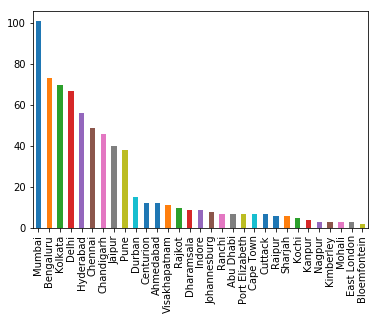

In [231]:
match['city'].value_counts().plot.bar()

#### 3.4 Cross tab plot to map winner against Bat vs. Chase

Kochi Tuskers has win all the 6 matches during chase followed by Rising Pune Supergiants with 87% win against chanse
Pune Warriors have maximum win i.e 75% against Bat followed by Chennai Super Kings with 56%

In [247]:
pd.crosstab([match.winner], match.toss_decision, margins=True).style.background_gradient(cmap='Set3')

toss_decision,bat,field,All
winner,,,
Chennai Super Kings,50,40,90
Deccan Chargers,14,15,29
Delhi Daredevils,29,38,67
Gujarat Lions,2,11,13
Kings XI Punjab,21,55,76
Kochi Tuskers Kerala,0,6,6
Kolkata Knight Riders,35,51,86
Mumbai Indians,42,59,101
Pune Warriors,9,3,12


#### 3.5 Cross tab to plot the win in the homeground

More than 50% of the win for majority of the team have achieved at their homeground

In [260]:
pd.crosstab([match.winner], match.city, margins=True).style.background_gradient(cmap='Set3')

city,Abu Dhabi,Ahmedabad,Bengaluru,Bloemfontein,Cape Town,Centurion,Chandigarh,Chennai,Cuttack,Delhi,Dharamsala,Durban,East London,Hyderabad,Indore,Jaipur,Johannesburg,Kanpur,Kimberley,Kochi,Kolkata,Mohali,Mumbai,Nagpur,Port Elizabeth,Pune,Raipur,Rajkot,Ranchi,Sharjah,Visakhapatnam,All
winner,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Chennai Super Kings,1,0,5,0,0,2,3,34,0,5,1,1,1,3,0,2,1,0,1,0,4,0,13,0,2,6,0,0,3,1,1,90
Deccan Chargers,0,0,1,0,2,2,0,2,3,2,2,2,0,3,0,0,2,0,1,1,0,0,3,2,0,1,0,0,0,0,0,29
Delhi Daredevils,0,1,3,1,1,2,1,2,0,27,1,3,1,4,0,1,1,1,0,1,1,0,4,0,1,3,4,1,0,1,1,67
Gujarat Lions,0,0,1,0,0,0,2,0,0,1,0,0,0,0,0,0,0,2,0,0,2,0,1,0,0,1,0,3,0,0,0,13
Kings XI Punjab,2,1,5,1,1,0,22,2,1,5,5,2,0,4,4,0,1,0,1,0,3,3,6,0,1,1,0,2,0,2,1,76
Kochi Tuskers Kerala,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,0,6
Kolkata Knight Riders,1,0,7,0,0,1,3,2,3,5,0,2,0,5,1,2,0,0,0,0,42,0,3,0,0,6,0,1,1,1,0,86
Mumbai Indians,0,1,10,0,1,1,4,3,0,4,0,0,1,5,2,2,0,0,0,0,10,0,48,0,2,4,0,1,0,0,2,101
Pune Warriors,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,3,0,0,4,0,0,1,0,0,12


#### 3.6 Bat vs. Field performace across seasons using factor plot and swarm plot

Field has seemingly shown an increase in performance over succeeding seasons. Players are becoming more consistent in terms of chasing the target against the opponent

C:\Users\amarwah\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


NameError: name 'plt' is not defined

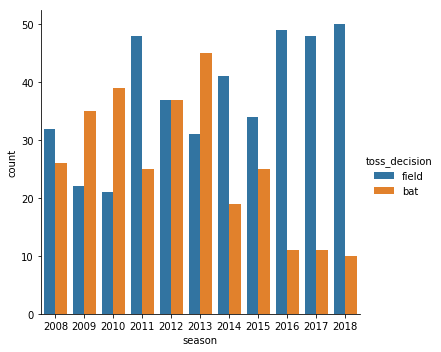

In [129]:
sns.factorplot('season', data=match, hue='toss_decision', kind='count')
plt.title('Count for City and Winner')

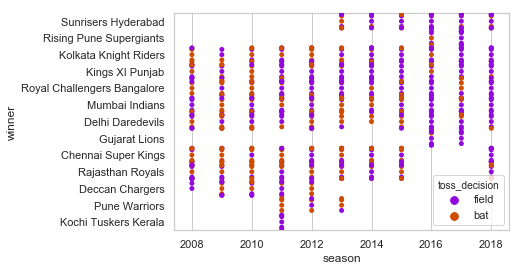

In [256]:
sns.set(style='whitegrid', palette='muted')
sns.swarmplot(x="season", y="winner", hue="toss_decision", palette="gnuplot", data=match)

#### 3.7 Maximum player of the match winnings using cross tab

Chris Gayle secures the maximum player of the match i.e. 6 wins in 2011
Virat Kohli and SE Marsh ties to win 5 times player of the match in 2016 and 2008
Also, Chris Gayle has been 20 times player of the match across all the seasons followed by AB de Villiers with 18 times

In [253]:
pd.crosstab([match.player_of_match], match.season, margins=True).style.background_gradient(cmap='Set3')